# importing libraries 

In [4]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud

# loading dataset

In [6]:
df = pd.read_csv('GenerativeAI tweets.csv', parse_dates=['Datetime'])
df.head()

,Unnamed: 0,Datetime,Tweet Id,Text,Username
0,0,2023-04-19 21:27:19+00:00,1648800467206672384,From Studio Gangster to Synthetic Gangster 🎤.....,resembleai
1,1,2023-04-19 21:27:09+00:00,1648800425540476929,Took me some time to find this. I build this #...,devaanparbhoo
2,2,2023-04-19 21:26:57+00:00,1648800376479715328,Mind blowing next wave #generativeai platform...,timreha
3,3,2023-04-19 21:26:49+00:00,1648800341193027584,Open Source Generative AI Image Specialist Sta...,VirtReview
4,4,2023-04-19 21:25:00+00:00,1648799883934203905,Are you an #HR leader considering which future...,FrozeElle


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56221 entries, 0 to 56220
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype              
---  ------      --------------  -----              
 0   Unnamed: 0  56221 non-null  int64              
 1   Datetime    56221 non-null  datetime64[ns, UTC]
 2   Tweet Id    56221 non-null  int64              
 3   Text        56221 non-null  object             
 4   Username    56221 non-null  object             
dtypes: datetime64[ns, UTC](1), int64(2), object(2)
memory usage: 2.1+ MB


In [10]:
daily_counts = df.set_index('Datetime').resample('D')['Tweet Id'].count()
print(daily_counts)

Datetime
2022-04-21 00:00:00+00:00      2
2022-04-22 00:00:00+00:00      1
2022-04-23 00:00:00+00:00      1
2022-04-24 00:00:00+00:00      1
2022-04-25 00:00:00+00:00      7
                            ... 
2023-04-15 00:00:00+00:00    522
2023-04-16 00:00:00+00:00    531
2023-04-17 00:00:00+00:00    800
2023-04-18 00:00:00+00:00    885
2023-04-19 00:00:00+00:00    886
Freq: D, Name: Tweet Id, Length: 364, dtype: int64


In [12]:
max(daily_counts)

1011

In [14]:
df['Datetime'].groupby(df.Datetime.dt.to_period("M")).agg('count')

C:\Users\User\AppData\Local\Temp\ipykernel_7660\325763368.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['Datetime'].groupby(df.Datetime.dt.to_period("M")).agg('count')


Datetime
2022-04       24
2022-05      105
2022-06       61
2022-07       55
2022-08      135
2022-09      219
2022-10      630
2022-11     1670
2022-12     3977
2023-01     6881
2023-02    11108
2023-03    19003
2023-04    12353
Freq: M, Name: Datetime, dtype: int64

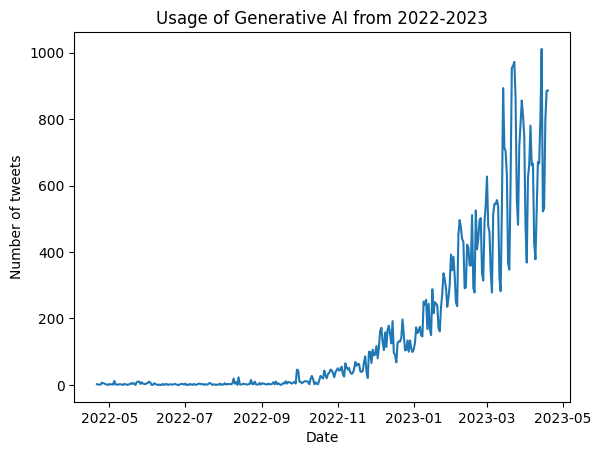

In [16]:
plt.plot(daily_counts.index, daily_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of tweets')
plt.title('Usage of Generative AI from 2022-2023')
plt.show()

Sentiment Distribution:
 sentiment
Positive    29199
Neutral     21709
Negative     5313
Name: count, dtype: int64

Positive Tweets:
5     #GenerativeAI is a new technology that can cre...
6     Salesforce announces plans to integrate Einste...
7     Discover the limitless possibilities of #Gener...
9     Salesforce announces plans to integrate Einste...
10    Check out my latest article: Four Ways #Genera...
12    @MoldyWarp Here are the images you requested, ...
15    Acquire a premium AI startup domain!\nStill av...
18    One more. Starting to get to grips with this w...
19    A person's surprised face as they spot a celeb...
20    🎯 Achieve “Product Market Fit” with Ai — https...
Name: Text, dtype: object

Negative Tweets:
22     What GenAI use cases are you exploring in the ...
37     Now some post-processing experiments to make t...
41     @Atlassian is adding an AI capability to the e...
42     The traffic at Stack Overflow has been declini...
44     well yes flawed, dangerous, 

C:\Users\User\AppData\Local\Temp\ipykernel_7660\2314099006.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="sentiment", data=df,palette='bright')


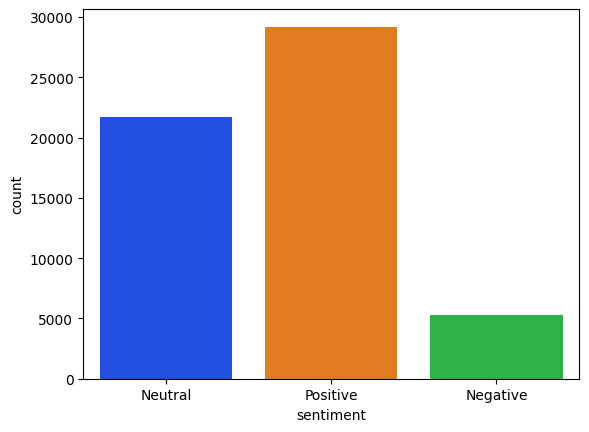

In [21]:
# Defining a function to classify sentiment
def get_sentiment(text):
    blob = TextBlob(text)
    sentiment = blob.sentiment.polarity
    if sentiment > 0:
        return "Positive"
    elif sentiment < 0:
        return "Negative"
    else:
        return "Neutral"

# To add a new column with the sentiment classification
df["sentiment"] = df["Text"].apply(get_sentiment)

# To print the number of tweets in each category
print("Sentiment Distribution:\n", df["sentiment"].value_counts())

# To print 10 tweets from each category
print("\nPositive Tweets:")
print(df[df["sentiment"] == "Positive"]["Text"].head(10))
print("\nNegative Tweets:")
print(df[df["sentiment"] == "Negative"]["Text"].head(10))
print("\nNeutral Tweets:")
print(df[df["sentiment"] == "Neutral"]["Text"].head(10))

# To visualize the distribution of sentiment
sns.countplot(x="sentiment", data=df,palette='bright')
plt.savefig('blob.png')

# wordcloud

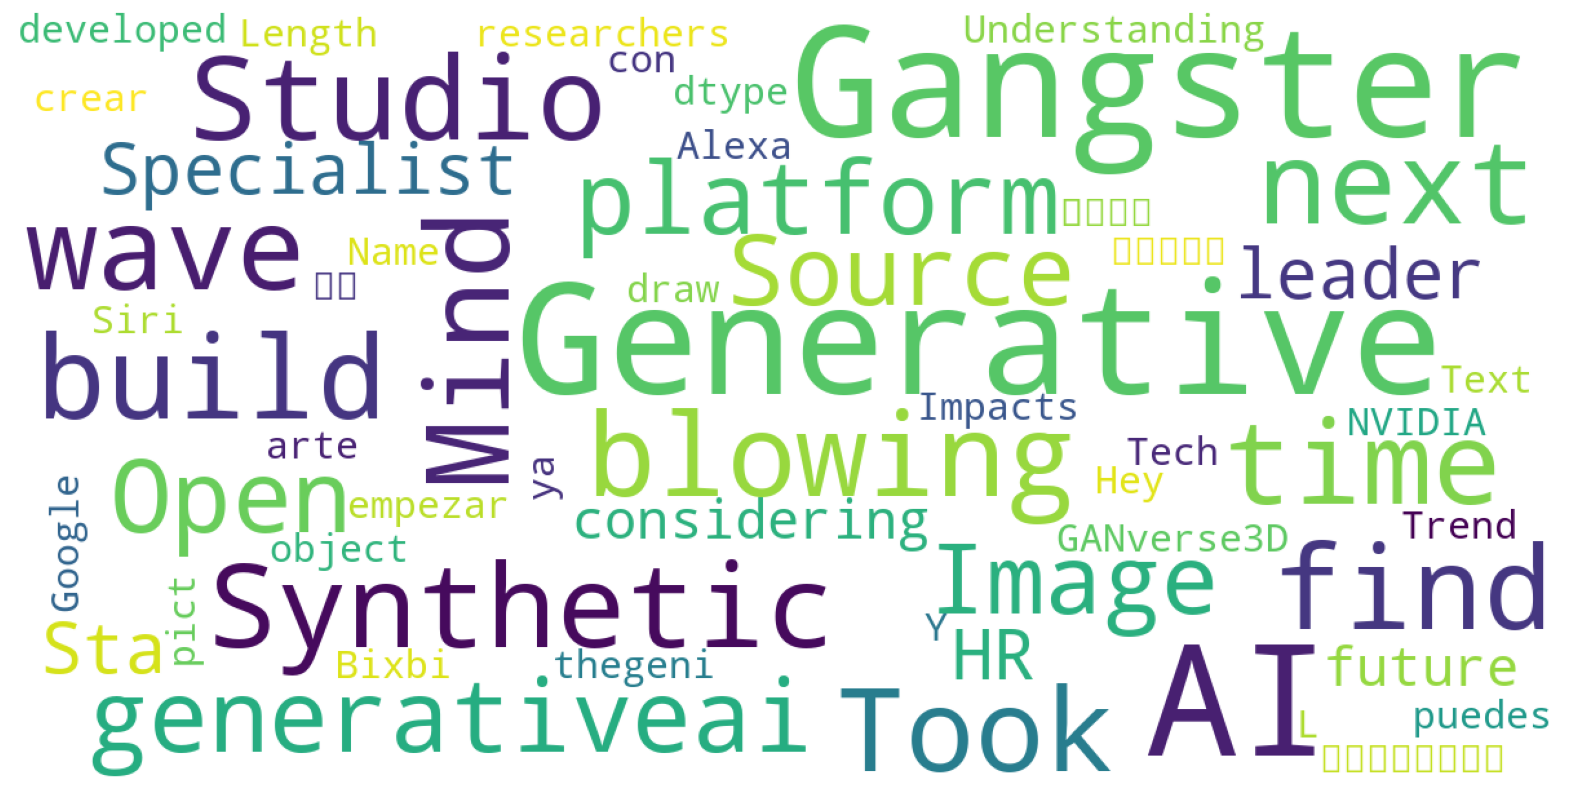

In [23]:
def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color = 'white',
        max_words = 200,
        max_font_size = 40, 
        scale = 3,
        random_state = 42
    ).generate(str(data))

    fig = plt.figure(1, figsize = (20, 20))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)

    plt.imshow(wordcloud)
    plt.show()
    
# print wordcloud
show_wordcloud(df["Text"])